# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [46]:
import random
import numpy as np

Xi=[1,-1]

def browniano_x ( x0 , T , dT ):
    x_mov=[x0]
    f=np.sqrt(dT)
    for i in range (round(T/dT)):
        x_mov.append( x_mov[-1] + (random.choice(Xi)*f) )
    
    return x_mov

def browniano_y ( y0 , T , dT ):
    y_mov=[y0]
    f=np.sqrt(dT)
    for i in range (round(T/dT)):
        y_mov.append(y_mov[-1] + (random.choice(Xi)*f))
    
    return y_mov

def browniano_z ( z0 , T , dT ):
    z_mov=[z0]
    f=np.sqrt(dT)
    for i in range (round(T/dT)):
        z_mov.append( z_mov[-1] + (random.choice(Xi)*f) )
    
    return z_mov

# Para una partícula que parte desde el punto (0,0,0)
x_trayectoria = browniano_x(0,10,0.001)
y_trayectoria = browniano_y(0,10,0.001)
z_trayectoria = browniano_z(0,10,0.001)

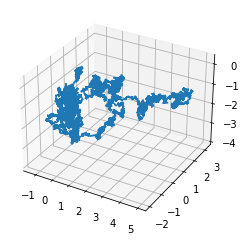

In [47]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=np.array([x_trayectoria])
y=np.array([y_trayectoria])
z=np.array([z_trayectoria])


ax.plot_wireframe(x, y, z)

plt.show()


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [11]:
import random
import numpy as np

def volado (c0=20):
    cx=[c0]
    
    while cx[-1]>0:
        v=random.randint(0,1)
        c=cx[-1]
        
        if v==0 and c>5:
            cx.append(c+(c/2))
        elif v==0 and c<6:
            cx.append(c+2)
        elif v==1 and c>5:
            cx.append(c-(c/2))
        elif v==1 and c<6:
            cx.append(c-2)
            
    return cx

#### 1. La evolución del capital hasta que el apostador queda en cero

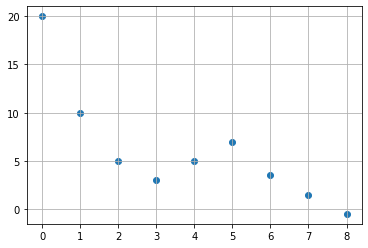

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

c=volado()
x=np.arange(0,len(c))

plt.figure()
plt.scatter(x,c)
plt.grid()


#### 2. Número promedio de volados hasta quedar en 0; con 10,000 simulaciones

In [23]:
c=[]

for i in range(10001):
    c.append(len(volado())-1)
    
c=np.array(c)

print(round(np.mean(c)))

27


El número promedio de volados en los que un apostador pierde todo su dinero es de ***27 volados***.

#### 3. Histograma del número de volados

(array([6.159e+03, 2.342e+03, 9.110e+02, 3.200e+02, 1.500e+02, 7.400e+01,
        2.400e+01, 1.600e+01, 3.000e+00, 2.000e+00]),
 array([  5. ,  25.4,  45.8,  66.2,  86.6, 107. , 127.4, 147.8, 168.2,
        188.6, 209. ]),
 <BarContainer object of 10 artists>)

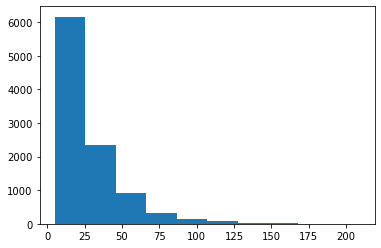

In [24]:
plt.figure()
plt.hist(c)